# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch.
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [18]:
import numpy as np
np.random.seed(42) # For reproducibility
def initialize_network(input_size, hidden_layers, output_size):
    # Your code should contain the weights and biases
    # provide your code

    #empty network
    network = []

   #sizes
    layer_sizes = [input_size] + hidden_layers + [output_size]

    # weights and biases
    for i in range(len(layer_sizes) - 1):
        layer = {
            'weights': np.random.randn(layer_sizes[i], layer_sizes[i + 1]),
            'biases': np.random.randn(1, layer_sizes[i + 1])
        }
        network.append(layer)

    return network

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("Israel + Initialized Network:", network)

Israel + Initialized Network: [{'weights': array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975]]), 'biases': array([[ 0.24196227, -1.91328024, -1.72491783, -0.56228753]])}, {'weights': array([[-1.01283112,  0.31424733, -0.90802408],
       [-1.4123037 ,  1.46564877, -0.2257763 ],
       [ 0.0675282 , -1.42474819, -0.54438272],
       [ 0.11092259, -1.15099358,  0.37569802]]), 'biases': array([[-0.60063869, -0.29169375, -0.60170661]])}, {'weights': array([[ 1.85227818],
       [-0.01349722],
       [-1.05771093]]), 'biases': array([[0.82254491]])}]


## Step 2: Compute Weighted Sum

In [19]:
def compute_weighted_sum(inputs, weights, biases):
    # Please numpy dot to calcuate the compute weighted with linear
    # provide your code
    return np.dot(inputs, weights) + biases


# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network[0]  # First layer
Z = compute_weighted_sum(inputs, layer['weights'], layer['biases'])
print("Israel + Weighted Sum:", Z)

Israel + Weighted Sum: [[ 0.39654123 -1.97498378 -1.13157277  0.30614137]]


## Step 3: Compute Node Activation

In [20]:
def sigmoid(Z):
#     provide your code
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    # provide your code

  return A * (1 - A)
# Compute activation for the weighted sum
A = sigmoid(Z)
print("Israel + Activation:", A)

Israel + Activation: [[0.59785637 0.12185459 0.24387097 0.57594313]]


## Step 4: Perform Forward Propagation

In [21]:
def forward_propagation(inputs, network):
    # provide your code
    activations = [inputs]

    # transformation
    for layer in network:

      #calling activation
        Z = compute_weighted_sum(activations[-1], layer['weights'], layer['biases'])
        A = sigmoid(Z)

        #appending
        activations.append(A)
    return activations

# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("Israel + Final Output:", activations[-1])

[array([[0.5, 0.2, 0.1]]), array([[0.59785637, 0.12185459, 0.24387097, 0.57594313]]), array([[0.2145172 , 0.28179311, 0.25190745]]), array([[0.72104313]])]
Israel + Final Output: [[0.72104313]]


## Step 5: Backpropagation

In [22]:
def backpropagation(network, activations, y_true):
    num_layers = len(network)  # Number of layers in the network
    gradients = []  # To store gradients for each layer

    # error at the output layer
    error = activations[-1] - y_true

    # error through the layers
    for i in range(num_layers - 1, -1, -1):
        layer = network[i]

        # delta for the current layer
        delta = error * sigmoid_derivative(activations[i + 1])

        # weights and biases
        dW = np.dot(activations[i].T, delta)
        db = np.sum(delta, axis=0, keepdims=True)

        gradients.insert(0, {'dW': dW, 'db': db})

        # error to the previous layer
        error = np.dot(delta, layer['weights'].T)

    return gradients


# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("Israel + Gradients:", gradients)

Israel + Gradients: [{'dW': array([[ 9.17179036e-04,  1.20018392e-03, -6.90509106e-04,
         2.54357391e-04],
       [ 3.66871614e-04,  4.80073569e-04, -2.76203642e-04,
         1.01742957e-04],
       [ 1.83435807e-04,  2.40036785e-04, -1.38101821e-04,
         5.08714783e-05]]), 'db': array([[ 0.00183436,  0.00240037, -0.00138102,  0.00050871]])}, {'dW': array([[-1.04697727e-02,  9.16340026e-05,  6.68644966e-03],
       [-2.13394032e-03,  1.86767659e-05,  1.36282658e-03],
       [-4.27071404e-03,  3.73783304e-05,  2.72746270e-03],
       [-1.00860240e-02,  8.82753404e-05,  6.44137114e-03]]), 'db': array([[-0.01751219,  0.00015327,  0.01118404]])}, {'dW': array([[-0.01203642],
       [-0.01581123],
       [-0.01413437]]), 'db': array([[-0.05610937]])}]


## Step 6: Update Weights

In [23]:
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code
    for i in range(len(network)):
        network[i]['weights'] -= learning_rate * gradients[i]['dW']
        network[i]['biases'] -= learning_rate * gradients[i]['db']
    return network


# Update weights with a learning rate of 0.1
update_weights(network, gradients, learning_rate=0.1)
print("Israel + Updated Network:", network)

Israel + Updated Network: [{'weights': array([[ 0.49662244, -0.13838432,  0.64775759,  1.52300442],
       [-0.23419006, -0.23418496,  1.57924044,  0.76742455],
       [-0.46949273,  0.54253604, -0.46340388, -0.46573484]]), 'biases': array([[ 0.24177884, -1.91352028, -1.72477973, -0.5623384 ]])}, {'weights': array([[-1.01178414,  0.31423817, -0.90869272],
       [-1.41209031,  1.4656469 , -0.22591258],
       [ 0.06795528, -1.42475192, -0.54465547],
       [ 0.11193119, -1.1510024 ,  0.37505388]]), 'biases': array([[-0.59888747, -0.29170908, -0.60282502]])}, {'weights': array([[ 1.85348183],
       [-0.0119161 ],
       [-1.05629749]]), 'biases': array([[0.82815585]])}]


## Step 7: Visualizing Loss Changes

In [24]:
# Use MSE to compute the loss
def compute_loss(y_true, y_pred):
    # provide your code
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

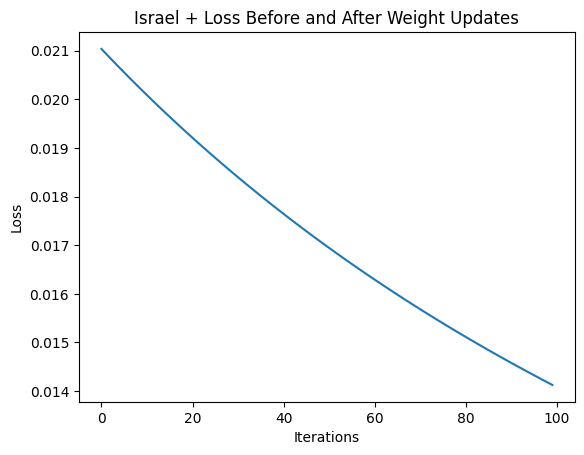

In [26]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(100):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
    forward_propagation(inputs, network)

    activations = forward_propagation(inputs, network)

    #getting the loss
    loss= compute_loss(y_true, activations[-1])
    losses.append(loss)

    # gradients = backpropagation function
    gradients = backpropagation(network, activations, y_true)

    # update_weights
    update_weights(network, gradients, learning_rate)


# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Israel + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code